In [1]:
import pandas as pd
df = pd.read_csv('df.csv')

In [ ]:
#Data exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         100 non-null    object 
 1   COPPER_PRICE                 100 non-null    float64
 2   BUY_PRICE                    100 non-null    float64
 3   GLOBAL_CONSUMER_PRICE_INDEX  100 non-null    float64
 4   SIX_MONTH_DEMAND             100 non-null    float64
 5   GOLD_PRICE                   100 non-null    float64
 6   INVENTORY                    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [3]:
df.describe()

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.224293,2.722543,159.989632,34.914723,2087.926152,28.700803
std,0.275635,0.275799,23.512718,9.555565,178.331839,11.567952
min,2.654811,2.145191,117.999071,11.625787,1802.154844,3.505353
25%,3.066623,2.571619,139.976578,27.905697,1933.797925,21.728733
50%,3.251567,2.749005,159.399685,34.725549,2094.859819,29.972672
75%,3.368083,2.881985,179.810986,41.643890,2248.064183,36.084329
max,3.906448,3.408610,199.289260,55.510056,2386.981577,55.818895


In [ ]:
#Data visualization

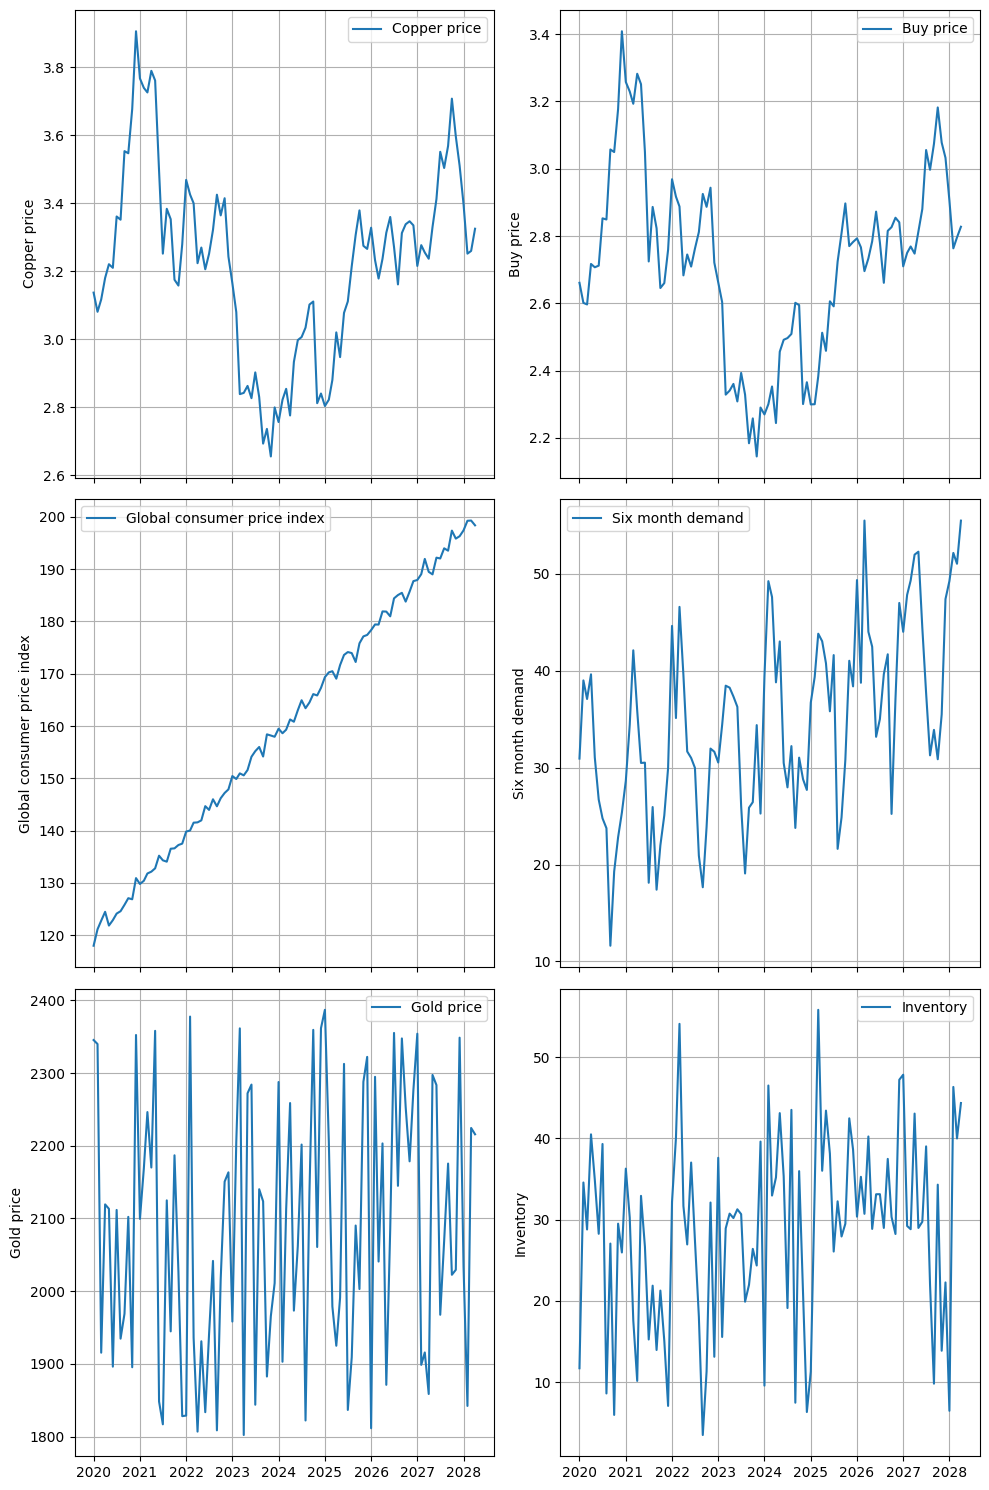

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['DATE'] = pd.to_datetime(df['DATE'])
df = pd.DataFrame(df)

fig, axs = plt.subplots(3,2, figsize=(10, 15), sharex=True)

axs[0][0].plot(df['DATE'], df['COPPER_PRICE'], label='Copper price')
axs[0][0].set_ylabel('Copper price')
axs[0][0].legend()
axs[0][0].grid()

axs[0][1].plot(df['DATE'], df['BUY_PRICE'], label='Buy price')
axs[0][1].set_ylabel('Buy price')
axs[0][1].legend()
axs[0][1].grid()

axs[1][0].plot(df['DATE'], df['GLOBAL_CONSUMER_PRICE_INDEX'], label='Global consumer price index')
axs[1][0].set_ylabel('Global consumer price index')
axs[1][0].legend()
axs[1][0].grid()

axs[1][1].plot(df['DATE'], df['SIX_MONTH_DEMAND'], label='Six month demand')
axs[1][1].set_ylabel('Six month demand')
axs[1][1].legend()
axs[1][1].grid()

axs[2][0].plot(df['DATE'], df['GOLD_PRICE'], label='Gold price')
axs[2][0].set_ylabel('Gold price')
axs[2][0].legend()
axs[2][0].grid()

axs[2][1].plot(df['DATE'], df['INVENTORY'], label='Inventory')
axs[2][1].set_ylabel('Inventory')
axs[2][1].legend()
axs[2][1].grid()


plt.tight_layout()

plt.show()

In [ ]:
#Creating correlation table

In [7]:
df_corr = df.drop('DATE', axis=1).corr()

In [8]:
df_corr["SIX_MONTH_DEMAND"].sort_values(ascending=False)

SIX_MONTH_DEMAND               1.000000
GLOBAL_CONSUMER_PRICE_INDEX    0.547820
INVENTORY                      0.473308
GOLD_PRICE                     0.102640
BUY_PRICE                     -0.079522
COPPER_PRICE                  -0.083283
Name: SIX_MONTH_DEMAND, dtype: float64

In [10]:
#Seasonal decomposition
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df.set_index('DATE', inplace=True)

decomp_demand = seasonal_decompose(df['SIX_MONTH_DEMAND'], model='additive', period=12)
decomp_price_index = seasonal_decompose(df['GLOBAL_CONSUMER_PRICE_INDEX'], model='additive', period=12)

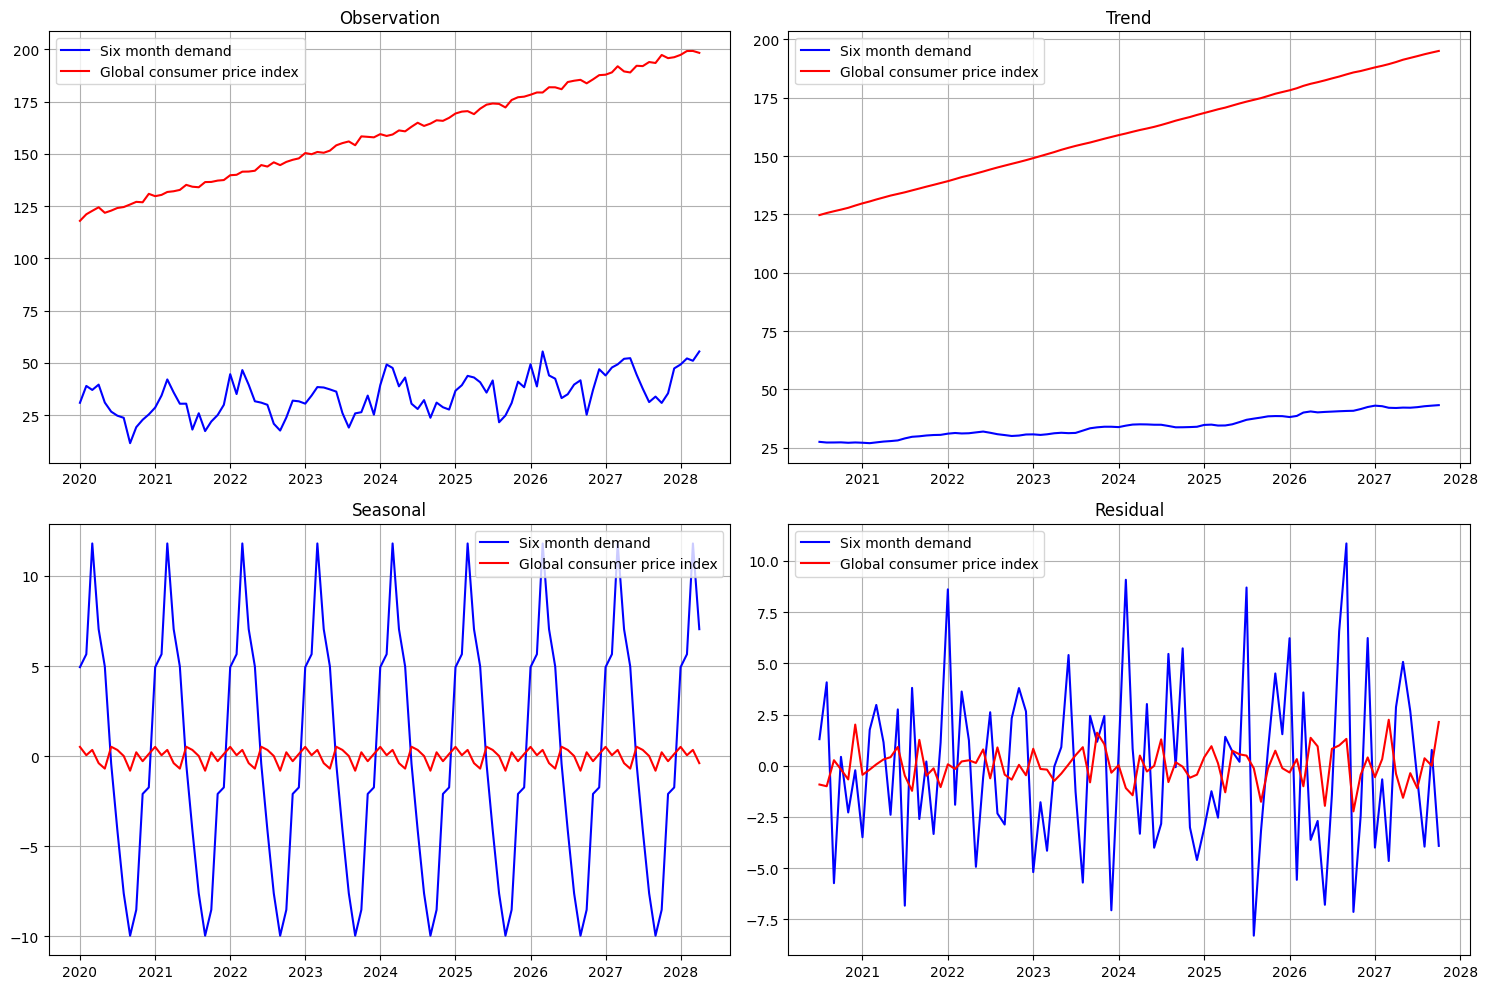

In [12]:
#Decomposition visualization: GCPI and demand
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(decomp_demand.observed, label='Six month demand', color='blue')
axs[0, 0].plot(decomp_price_index.observed, label='Global consumer price index', color='red')
axs[0, 0].set_title('Observation')
axs[0, 0].legend()
axs[0, 0].grid()


axs[0, 1].plot(decomp_demand.trend, label='Six month demand', color='blue')
axs[0, 1].plot(decomp_price_index.trend, label='Global consumer price index', color='red')
axs[0, 1].set_title('Trend')
axs[0, 1].legend()
axs[0, 1].grid()


axs[1, 0].plot(decomp_demand.seasonal, label='Six month demand', color='blue')
axs[1, 0].plot(decomp_price_index.seasonal, label='Global consumer price index', color='red')
axs[1, 0].set_title('Seasonal')
axs[1, 0].legend()
axs[1, 0].grid()


axs[1, 1].plot(decomp_demand.resid, label='Six month demand', color='blue')
axs[1, 1].plot(decomp_price_index.resid, label='Global consumer price index', color='red')
axs[1, 1].set_title('Residual')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

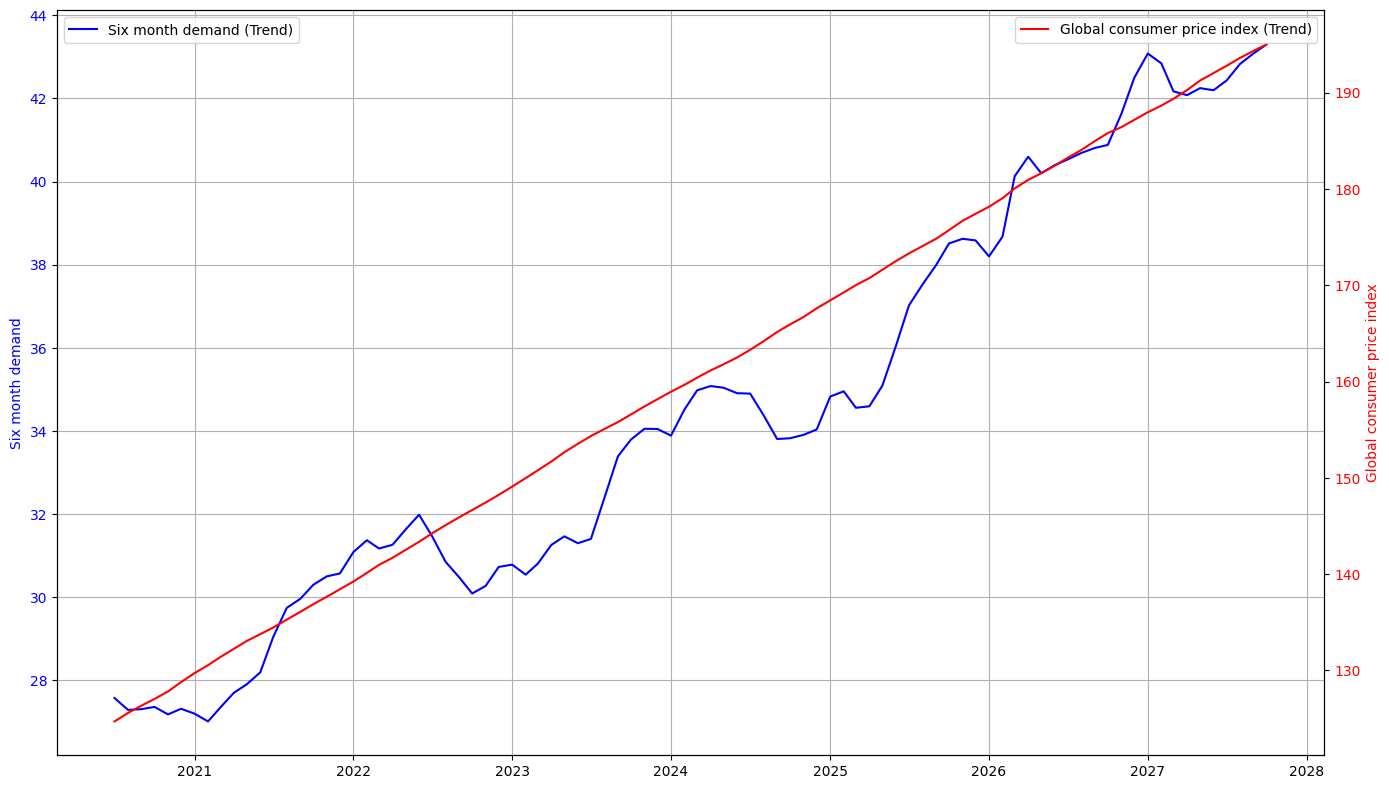

In [16]:
#Trend: GCPI and demand
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(decomp_demand.trend.index, decomp_demand.trend, 'b-', label='Six month demand (Trend)')
ax1.set_ylabel('Six month demand', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(decomp_price_index.trend.index, decomp_price_index.trend, 'r-', label='Global consumer price index (Trend)')
ax2.set_ylabel('Global consumer price index', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')


plt.tight_layout()

plt.show()

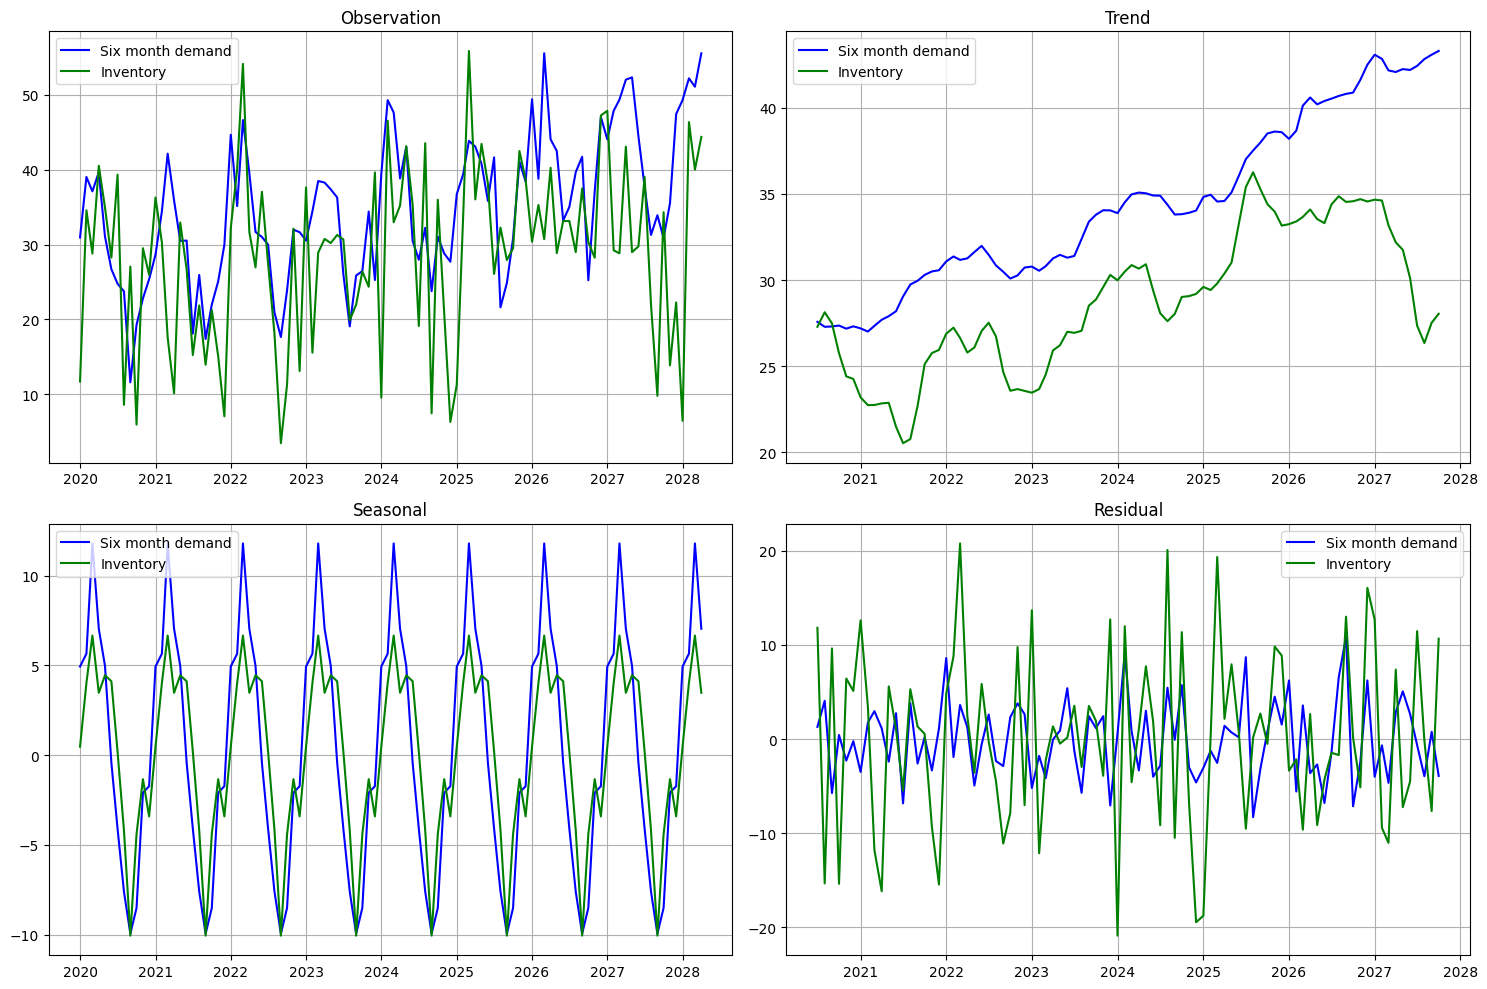

In [81]:
#Decomposition visualization: Inventory and demand
decomp_demand = seasonal_decompose(df['SIX_MONTH_DEMAND'], model='additive', period=12)
decomp_inventory = seasonal_decompose(df['INVENTORY'], model='additive', period=12)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(decomp_demand.observed, label='Six month demand', color='blue')
axs[0, 0].plot(decomp_inventory.observed, label='Inventory', color='green')
axs[0, 0].set_title('Observation')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(decomp_demand.trend, label='Six month demand', color='blue')
axs[0, 1].plot(decomp_inventory.trend, label='Inventory', color='green')
axs[0, 1].set_title('Trend')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(decomp_demand.seasonal, label='Six month demand', color='blue')
axs[1, 0].plot(decomp_inventory.seasonal, label='Inventory', color='green')
axs[1, 0].set_title('Seasonal')
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(decomp_demand.resid, label='Six month demand', color='blue')
axs[1, 1].plot(decomp_inventory.resid, label='Inventory', color='green')
axs[1, 1].set_title('Residual')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

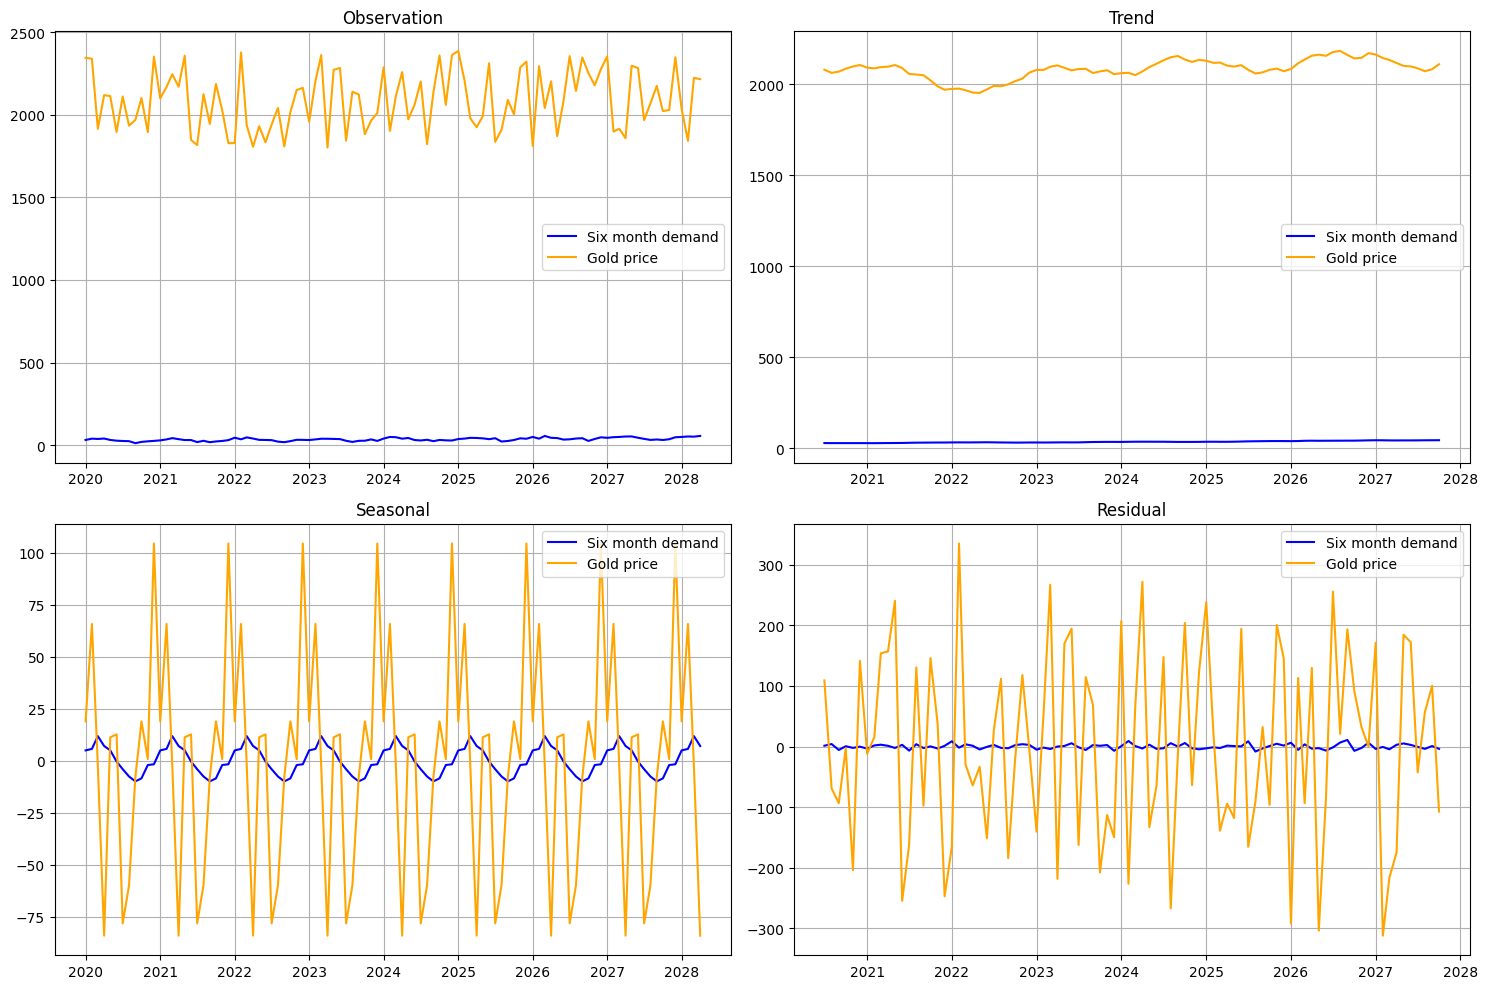

In [82]:
#Decomposition visualization: Gold Price and demand
decomp_demand = seasonal_decompose(df['SIX_MONTH_DEMAND'], model='additive', period=12)
decomp_gold_price = seasonal_decompose(df['GOLD_PRICE'], model='additive', period=12)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(decomp_demand.observed, label='Six month demand', color='blue')
axs[0, 0].plot(decomp_gold_price.observed, label='Gold price', color='orange')
axs[0, 0].set_title('Observation')
axs[0, 0].legend()
axs[0, 0].grid()

axs[0, 1].plot(decomp_demand.trend, label='Six month demand', color='blue')
axs[0, 1].plot(decomp_gold_price.trend, label='Gold price', color='orange')
axs[0, 1].set_title('Trend')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(decomp_demand.seasonal, label='Six month demand', color='blue')
axs[1, 0].plot(decomp_gold_price.seasonal, label='Gold price', color='orange')
axs[1, 0].set_title('Seasonal')
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].plot(decomp_demand.resid, label='Six month demand', color='blue')
axs[1, 1].plot(decomp_gold_price.resid, label='Gold price', color='orange')
axs[1, 1].set_title('Residual')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

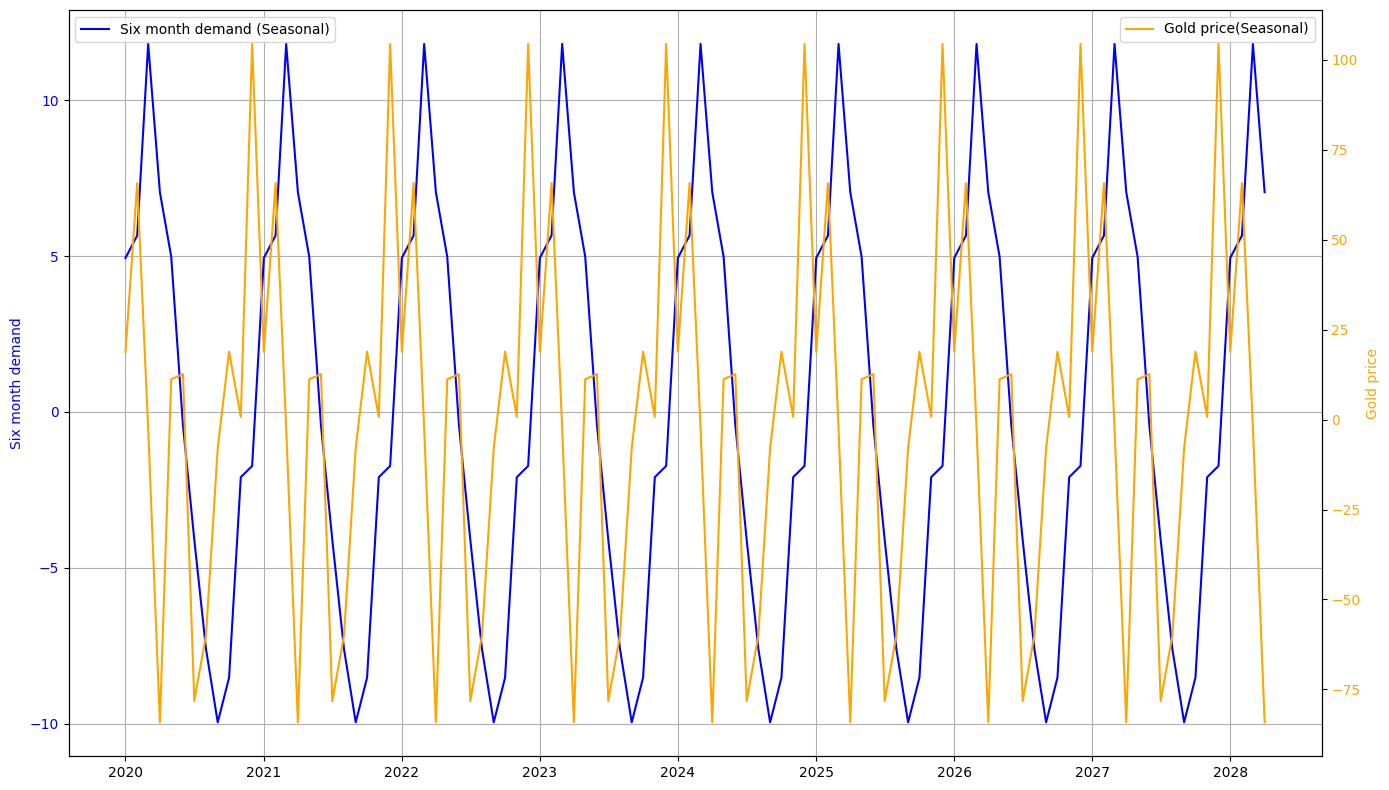

In [25]:
#Seasonal: Gold price and demand
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(decomp_demand.seasonal.index, decomp_demand.seasonal, 'b-', label='Six month demand (Seasonal)')
ax1.set_ylabel('Six month demand', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(decomp_gold_price.seasonal.index, decomp_gold_price.seasonal, '-', color='orange', label='Gold price(Seasonal)')
ax2.set_ylabel('Gold price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')


plt.tight_layout()

plt.show()

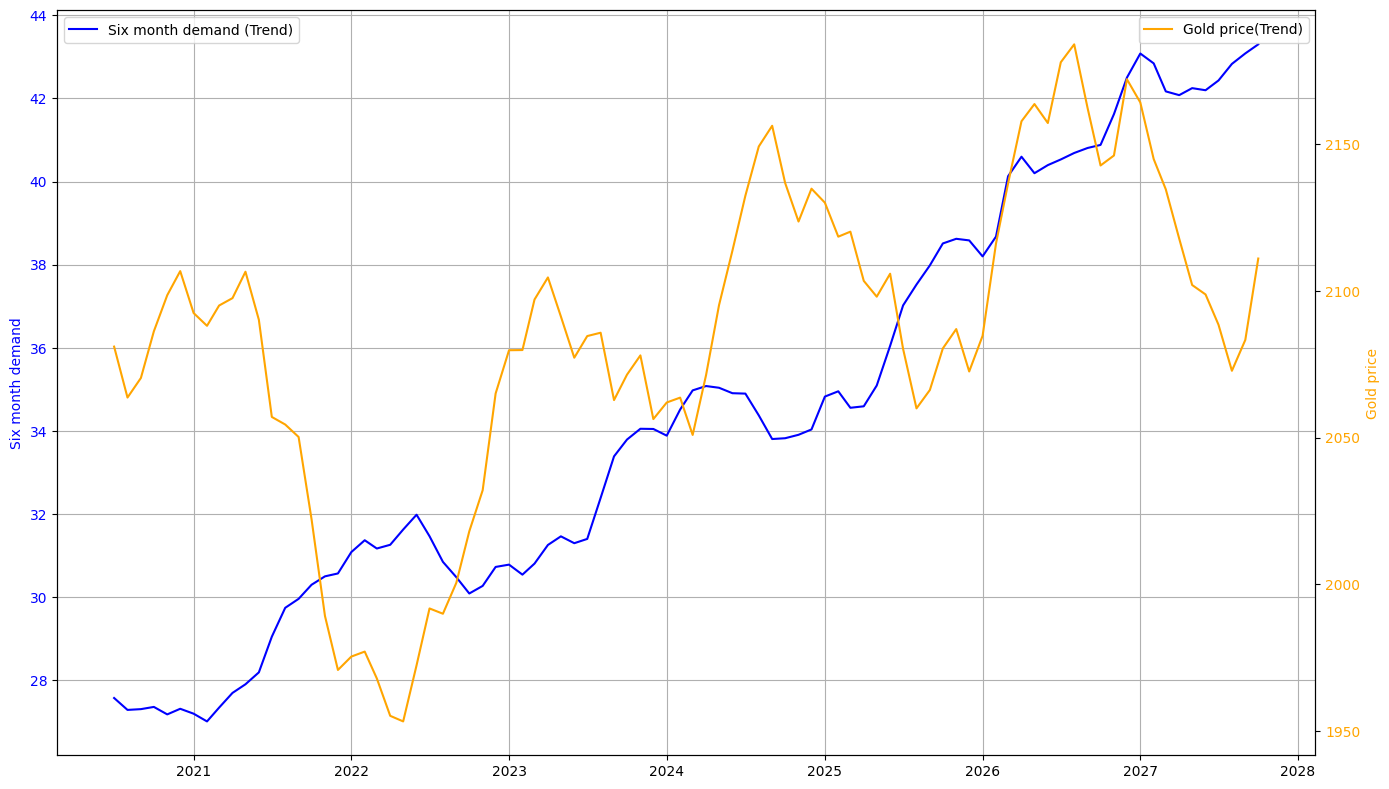

In [27]:
#Trend: Gold price and demand
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(decomp_demand.trend.index, decomp_demand.trend, 'b-', label='Six month demand (Trend)')
ax1.set_ylabel('Six month demand', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(decomp_gold_price.trend.index, decomp_gold_price.trend, '-', color='orange', label='Gold price(Trend)')
ax2.set_ylabel('Gold price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')


plt.tight_layout()

plt.show()

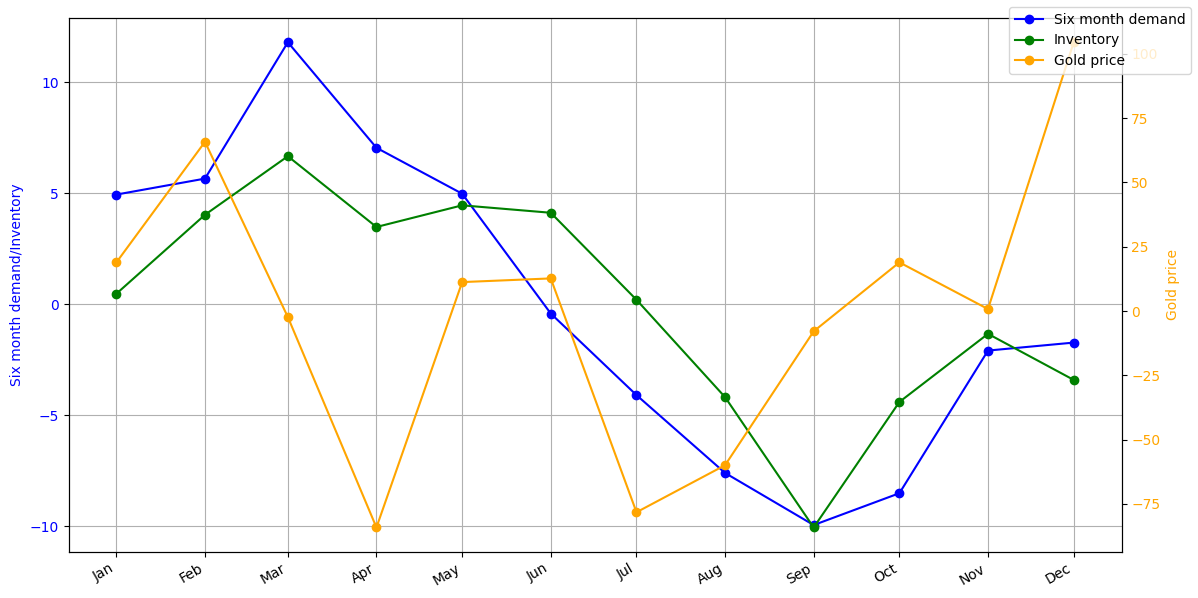

In [84]:
#One year analysis: demand, gold price, inventory
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(decomp_demand.seasonal[:12].index, decomp_demand.seasonal[:12], 'o-', color='blue', label='Six month demand')
ax1.set_ylabel('Six month demand/Inventory', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_major_locator(MonthLocator(interval=1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.grid()


ax2 = ax1.twinx()
ax2.plot(decomp_gold_price.seasonal[:12].index, decomp_gold_price.seasonal[:12], 'o-', color='orange', label='Gold price')
ax2.set_ylabel('Gold price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax3=ax1
ax1.plot(decomp_inventory.seasonal[:12].index, decomp_inventory.seasonal[:12], 'o-', color='green', label='Inventory')

fig.legend()
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

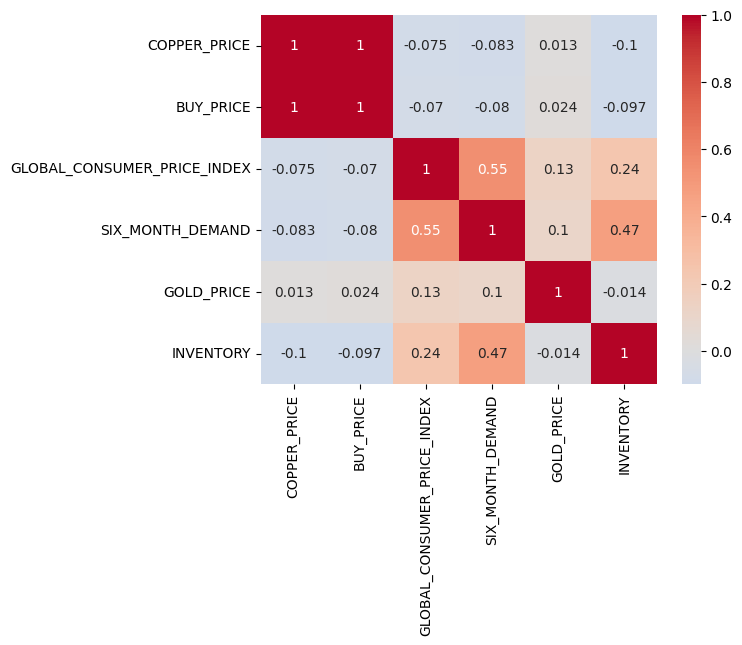

In [48]:
#Correlation visualization
import seaborn as sns
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.show()

In [49]:
#Creating MONTH column
df_prep = df
df_prep['MONTH'] =df.index.month
df_prep

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,MONTH
DATE,,,,,,,
2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919,1
2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074,2
2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901,3
2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696,4
2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412,5
...,...,...,...,...,...,...,...
2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791,12
2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046,1
2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669,2


In [50]:
df_prep.corr()

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,MONTH
COPPER_PRICE,1.000000,0.997849,-0.074692,-0.083283,0.012948,-0.099819,0.107740
BUY_PRICE,0.997849,1.000000,-0.069915,-0.079522,0.023903,-0.096886,0.108669
GLOBAL_CONSUMER_PRICE_INDEX,-0.074692,-0.069915,1.000000,0.547820,0.129320,0.238538,0.033823
SIX_MONTH_DEMAND,-0.083283,-0.079522,0.547820,1.000000,0.102640,0.473308,-0.524430
GOLD_PRICE,0.012948,0.023903,0.129320,0.102640,1.000000,-0.014013,0.021303
INVENTORY,-0.099819,-0.096886,0.238538,0.473308,-0.014013,1.000000,-0.275364
MONTH,0.107740,0.108669,0.033823,-0.524430,0.021303,-0.275364,1.000000


In [51]:
#Data split function using hash
import numpy as np
from zlib import crc32
def test_set_check(identifier, test_ratio):
    identifier_int = int(pd.Timestamp(identifier).timestamp())
    return crc32(np.int64(identifier_int)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [52]:
df_prep_id = df_prep.reset_index()
train_set, test_set = split_train_test_by_id(df_prep_id, 0.2, "DATE")

In [92]:
train = train_set.drop(["SIX_MONTH_DEMAND", "DATE","COPPER_PRICE", "BUY_PRICE"], axis=1)
df_labels = train_set["SIX_MONTH_DEMAND"].copy()

In [93]:
#Data preparation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])
df_tr = pipeline.fit_transform(train)
df_tr

array([[-1.89921776,  1.29548641,  0.58700449, -1.45993039],
       [-1.81790954, -1.14402371, -0.00537001, -0.26581366],
       [-1.75961058,  0.04088881,  1.03182594,  0.03271553],
       [-1.63228009, -1.14855938,  0.11150465,  1.22683226],
       [-1.44403429,  1.36378423, -0.22095642,  1.52536145],
       [-1.40295939,  0.78094558, -1.00550545, -1.16140121],
       [-1.38668202,  0.36166865, -1.70401186, -0.86287202],
       [-1.35697332,  1.39515366,  0.43280891, -0.56434284],
       [-1.2445287 , -1.40776011, -0.15554304, -0.26581366],
       [-1.28573604, -1.580129  , -1.22577956,  0.03271553],
       [-1.29776189,  0.11332792, -0.60438184,  0.33124471],
       [-1.18250751, -0.87728713, -1.34709305,  0.62977389],
       [-1.17920901,  0.45408942, -0.66133064,  0.92830308],
       [-1.14953661, -0.42693348, -1.24163258,  1.22683226],
       [-1.02057326,  1.50301896,  1.10175163, -1.45993039],
       [-0.94819173, -1.63530451,  0.31539539, -0.86287202],
       [-0.93032948, -0.

In [94]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Deviation:", scores.std())

In [95]:
#Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_tr, df_labels)

LinearRegression()

In [96]:
some_data = train.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [34.7766615  26.56539661 29.17082719 21.58526118 22.79705428]


In [97]:
print("Labels:", list(some_labels))

Labels: [39.01060581, 26.70713771, 24.77679985, 22.81318273, 25.366376]


In [98]:
df_test = test_set.drop(["SIX_MONTH_DEMAND", "DATE","COPPER_PRICE", "BUY_PRICE"], axis=1)
df_test_labels = test_set["SIX_MONTH_DEMAND"].copy()

In [99]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_tr)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.60587167849416

In [100]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, df_tr, df_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.6170058  4.57407352 4.76367817 5.7124735  5.75964856 4.01585735
 7.15391542 6.72120649 8.12885156 6.69255712]
Mean: 6.013926747941052
Deviation: 1.2198803587031903


In [63]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_tr, df_labels)

DecisionTreeRegressor()

In [64]:
df_predictions = tree_reg.predict(df_tr)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [66]:
scores = cross_val_score(tree_reg, df_tr, df_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [ 5.30888002  4.24029792  5.95262695  7.5398894   5.22356155  5.23370121
  6.61473219 10.19342493  7.35371502  9.30887423]
Mean: 6.696970343088651
Deviation: 1.8172505897830047


In [67]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_tr, df_labels)

RandomForestRegressor()

In [68]:
df_predictions = forest_reg.predict(df_tr)
rnd_fr_mse = mean_squared_error(df_labels, df_predictions)
rnd_fr_rmse = np.sqrt(rnd_fr_mse)
rnd_fr_rmse

1.9165860930618883

In [69]:
rnd_fr_scores = cross_val_score(forest_reg, df_tr, df_labels,scoring="neg_mean_squared_error", cv=10)
rnd_fr_rmse_scores = np.sqrt(-lin_scores)
display_scores(rnd_fr_rmse_scores)

Scores: [6.6170058  4.57407352 4.76367817 5.7124735  5.75964856 4.01585735
 7.15391542 6.72120649 8.12885156 6.69255712]
Mean: 6.013926747941052
Deviation: 1.2198803587031903
